**Overview:**
In this article, we will be predicting the profit from the startup’s dataset with the features available to us. We're using the 50-startups dataset for this problem statement and we will be using the concept of Linear & Multiple linear regression to predict the profit of startups companies.

**About Dataset:**
This particular dataset holds data from 50 startups in New York, California, and Florida. The features in this dataset are R&D spending, Administration Spending, Marketing Spending, and location features, while the target variable is: Profit. –Source.

1. R&D spending: The amount which startups are spending on Research and development.
2. Administration spending: The amount which startups are spending on the Admin panel.
3. Marketing spending: The amount which startups are spending on marketing strategies.
4. State: To which state that particular startup belongs.
5. Profit: How much profit that particular startup is making.

**Table of content:**
1. Importing libraries
2. Analyzing the data
3. EDA on the dataset
4. Data Visualization
5. Feature exploration
6. Model development
7. Model evaluation

In [1]:
# Importing Required Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
f=pd.read_csv("50_Startups.csv")
f.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##  Exploratory Data Analysis

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


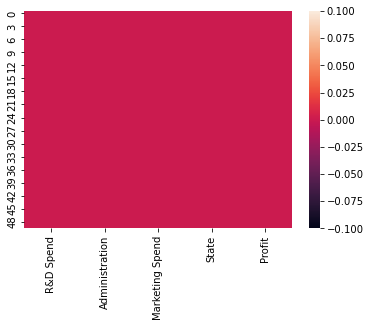

In [3]:
# Handling nan valuues
print(f.isna().sum())
sns.heatmap(f.isna());

**Conclusion:**
           we can observe that,there are no missing values in dataset.

In [4]:
f.shape

(50, 5)

In [5]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
f.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Data visualization

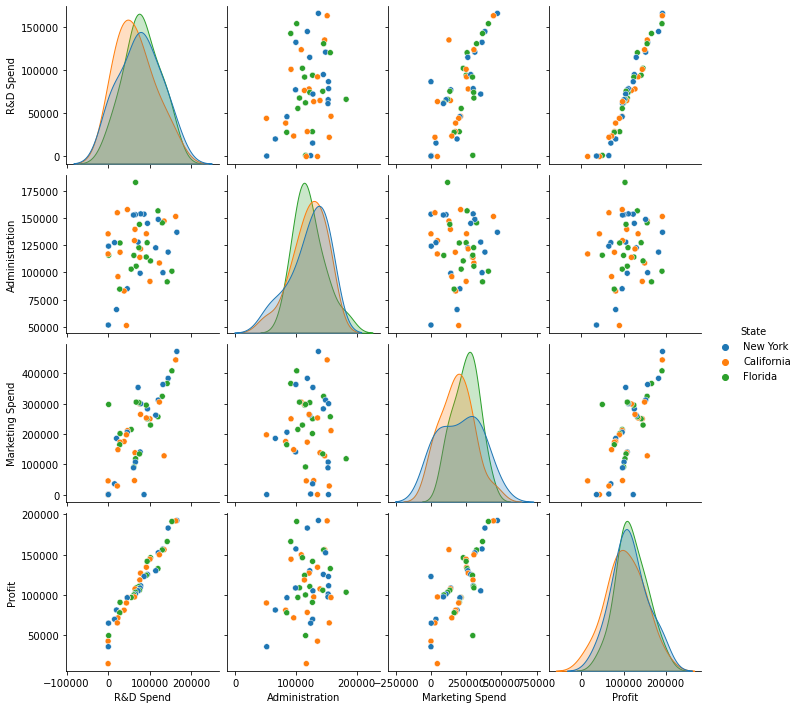

In [7]:
#Plotting Scatter Plot
sns.pairplot(f, hue="State",height=2.5,kind="scatter")
plt.show();

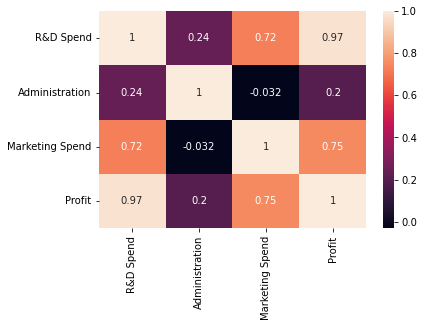

In [8]:
sns.heatmap(f.corr(),annot=True);

**Conclusion:**
we can see that all three columns have a direct relationship with the Profit which is our target variable. 
         There is high positive correlation between Profit and R&D spend and  low positive correlation between Profit and Administration.

In [9]:
col=f.drop("State",axis=1)

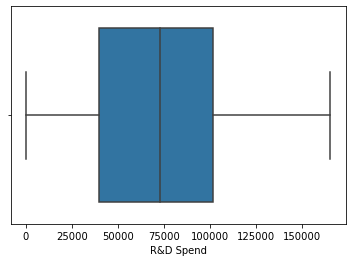

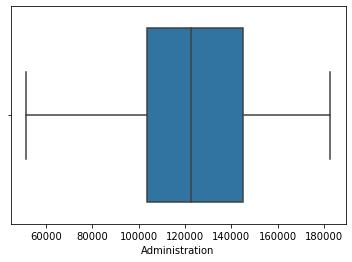

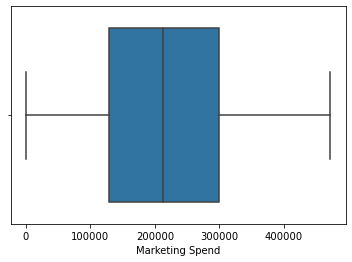

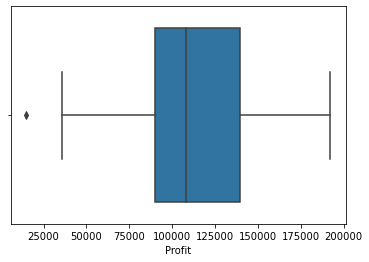

In [10]:
# boxplot
for i in col.columns:
    sns.boxplot(f[i]);
    plt.show();

**Conclusion:** From the Boxplots we can see that there is no any otliers in the data.


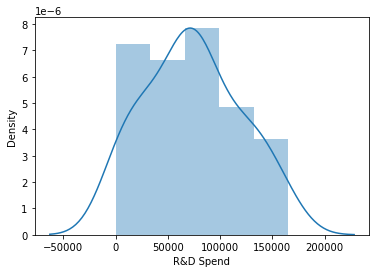

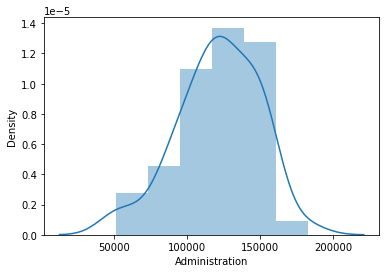

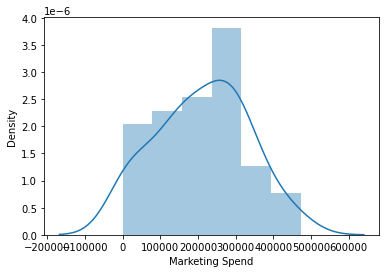

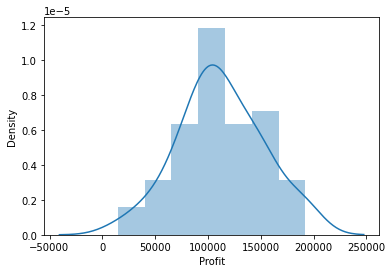

In [11]:
#checking the normality
for i in col.columns:
    sns.distplot(f[i]);
    plt.show();

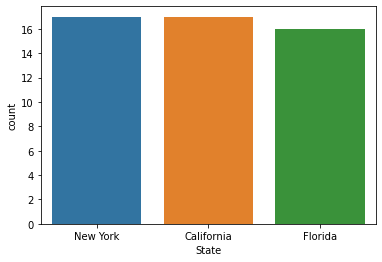

In [12]:
sns.countplot("State",data=f);

In [13]:
f['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

### Categorical value handling


In [14]:
x=pd.get_dummies(f["State"],drop_first=True,dtype='int64')
x.head(3)

,Florida,New York
0,0,1
1,0,0
2,1,0


In [15]:
df=pd.concat([f,x],axis=1)
df.drop("State",axis=1,inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### Skewness Handling

In [16]:
from scipy.stats import skew

R&D Spend
0.15904052321503395


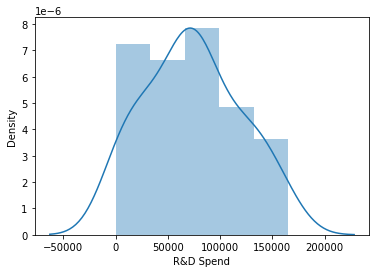

Administration
-0.4742300698920047


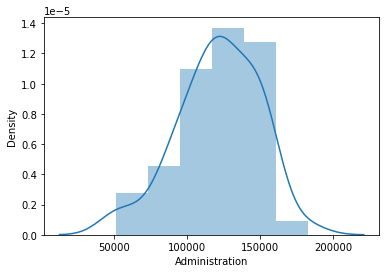

Marketing Spend
-0.04506631617666136


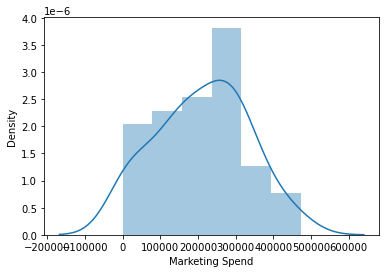

Profit
0.02258638356958943


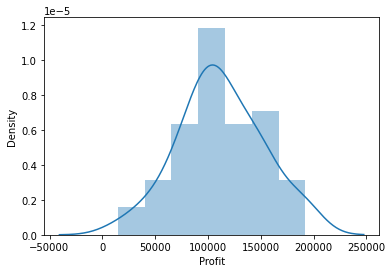

Florida
0.7717436331412896


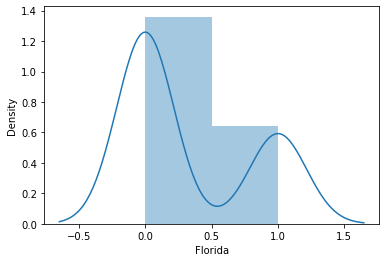

New York
0.6755205294731983


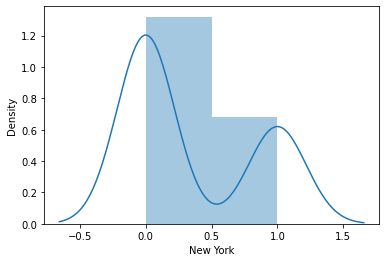

In [17]:
for col in df:
    print(col)
    print(skew(df[col]))
    sns.distplot(df[col])
    plt.show()

**conclusion:**we can say that there is not very much skewness in the data so there is no need to handle the skewness.

## Creating Module

In [18]:
# Data is ready for ML algoritham
df.sample(5)

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
36,28663.76,127056.21,201126.82,90708.19,1,0
19,86419.70,153514.11,0.00,122776.86,0,1
34,46426.07,157693.92,210797.67,96712.80,0,0
31,61136.38,152701.92,88218.23,97483.56,0,1
43,15505.73,127382.30,35534.17,69758.98,0,1


### Linear Regression

In [19]:
# Importing liabries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [20]:
#split our data into dependent and independent dataset
X=df["R&D Spend"].values.reshape(-1,1)
y=df['Profit'].values

In [21]:
#Splitting Dataset into Train & Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [25]:
r2_score(y_train,y_train_pred)

0.9449589778363044

In [26]:
r2_score(y_test,y_test_pred)

0.9464587607787219

**Conclusion**: By Linear Regression we are getting the 94.64% r2_score for testing data.

In [27]:
#Cross_Validation for Linear_model
import numpy as np
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
score_train=cross_val_score(lr,X_train,y_train,cv=5)
score_test=cross_val_score(lr,X_test,y_test,cv=5)

print(score_train)
print(score_test)

acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.81191441 0.90128655 0.91201139 0.9215112  0.98800854]
[ 0.91330627  0.97043243  0.93409069 -0.98801112  0.89352864]
acc_score_train : 0.9069464167035113
acc_score_test : 0.9398738308295002


## Regularization

In [28]:
#Lasso Regularization
from sklearn.linear_model import Lasso
lso=Lasso(alpha=50, max_iter=100, tol=0.1)
lso.fit(X_train,y_train)
print("lasso_train_score:",lso.score(X_train,y_train))
print("lasso_test_score:",lso.score(X_test,y_test))

lasso_train_score: 0.9449589778363037
lasso_test_score: 0.9464587594621938


In [29]:
# Ridge Regulization
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=50, max_iter=100, tol=0.1)
ridge.fit(X_train,y_train)
print("Ridge_train_score:",ridge.score(X_train,y_train))
print("Ridge_test_score:",ridge.score(X_test,y_test))

Ridge_train_score: 0.9449589778363044
Ridge_test_score: 0.9464587607506924


In [30]:
#ElasticNet Regularization
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=50, max_iter=100, tol=0.1)
enet.fit(X_train,y_train)
print("ENet_train_score:",enet.score(X_train,y_train))
print("ENet_train_score:",enet.score(X_test,y_test))

ENet_train_score: 0.9449589778363038
ENet_train_score: 0.9464587595598652


**Conclusion:** ElasticNet regularization technique gives the best score for both training & testing data is 94.64%

In [31]:
#Cross_Validation for Ridge
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

score_train=cross_val_score(ridge,X_train,y_train,cv=5)
score_test=cross_val_score(ridge,X_test,y_test,cv=5)

print(score_train)
print(score_test)

acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.81191442 0.90128655 0.91201139 0.9215112  0.98800854]
[ 0.91330627  0.97043243  0.93409068 -0.98801106  0.89352865]
acc_score_train : 0.9069464167921367
acc_score_test : 0.9398738200256972


In [32]:
# checking for Actual vs Predicted values
result=pd.DataFrame({'Actual':y_test,"Predicted":y_test_pred})
result.sample(5)

,Actual,Predicted
2,146121.95,135207.800195
1,144259.40,134150.834106
3,77798.83,72170.544289
8,110352.25,111431.752024
7,97483.56,100481.432771


### **Multiple Linear Regression**


In [33]:
X=df.drop(['Profit'],axis=1)
y=df['Profit']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [37]:
r2_score(y_train,y_train_pred)

0.9501847627493607

In [38]:
r2_score(y_test,y_test_pred)

0.9347068473282423

**Conclusion**: By Multiple Linear Regression we are getting the 93.47% r2_score for testing data.

In [39]:
#Cross_Validation for Multiple Linear
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=4,shuffle=True,random_state=0)
score_train=cross_val_score(lr,X_train,y_train,cv=fold)

print(score_train)
print()
acc_score_train=np.mean(abs(score_train))

print("acc_score_train :",acc_score_train)

[0.86192695 0.97075663 0.89537711 0.88946334]

acc_score_train : 0.9043810070355621


In [40]:
#Lasso Regulization
from sklearn.linear_model import Lasso
lso=Lasso(alpha=50, max_iter=100, tol=0.1)
lso.fit(X_train,y_train)
print("lasso_train_score:",lso.score(X_train,y_train))
print("lasso_test_score:",lso.score(X_test,y_test))

lasso_train_score: 0.9501417572279438
lasso_test_score: 0.937473008050263


In [41]:
# Ridge Regulization
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=50, max_iter=100, tol=0.1)
ridge.fit(X_train,y_train)
print("Ridge_train_score:",ridge.score(X_train,y_train))
print("Ridge_test_score:",ridge.score(X_test,y_test))

Ridge_train_score: 0.950030934491521
Ridge_test_score: 0.9386584503053871


In [42]:
#ElasticNet Regularization
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=50, max_iter=100, tol=0.1)
enet.fit(X_train,y_train)
print("ENet_train_score:",enet.score(X_train,y_train))
print("ENet_test_score:",enet.score(X_test,y_test))

ENet_train_score: 0.9499466093045639
ENet_test_score: 0.9402987765462502


**conclusion:** Score for ElasticNet Regularization  is 94.02% That means model is good enough for deployment

In [43]:
#KFold for ElasticNet
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

enet = ElasticNet()
fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(enet,X_train,y_train,cv=fold)

print(score_train)
print()
acc_score_train=np.mean(abs(score_train))

print("acc_score_train :",acc_score_train)

[0.89429726 0.97222462 0.97265661 0.92409919 0.82928506]

acc_score_train : 0.9185125491398495


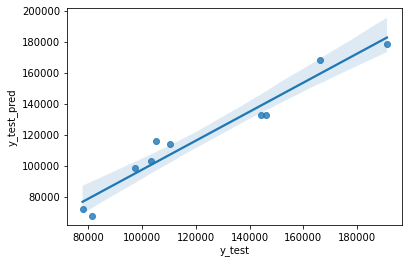

In [44]:
sns.regplot(y_test,y_test_pred)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show();

**After observing this plot we can see there is close prediction.between Actual & predicted data.**

In [45]:
result=pd.DataFrame({'Actual':y_test,"Predicted":y_test_pred})
result.sample(5)

,Actual,Predicted
38,81229.06,67851.692097
31,97483.56,98791.733747
11,144259.40,132582.277608
27,105008.31,116161.242302
10,146121.95,132447.738452
